In [1]:
import os
import sys
import numpy as np

from pommerman.agents import SimpleAgent, RandomAgent, PlayerAgent, BaseAgent
from pommerman.configs import team_competition_env
from pommerman.envs.v0 import Pomme
from pommerman.characters import Bomber
from pommerman import utility

from IPython import display
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
config = team_competition_env()
env = Pomme(**config["env_kwargs"])

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.


In [3]:
agents = {}
for agent_id in range(4):
    agents[agent_id] = SimpleAgent(config["agent"](agent_id, config["game_type"]))
env.set_agents(list(agents.values()))
env.set_init_game_state(None)

KeyboardInterrupt: 

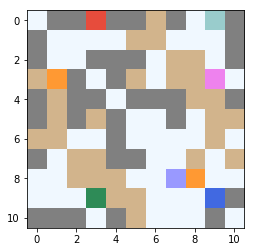

In [4]:
env.seed()
obs = env.reset()
rewards = []
# Run the random agents until we're done
done = False
while not done:
    plt.imshow(env.render(mode='rgb_array')/255)
    display.display(plt.gcf())
    display.clear_output(wait=True)
    actions = env.act(obs)
    obs, reward, done, info = env.step(actions)
    rewards.append(reward)
plt.imshow(env.render(mode='rgb_array')/255)
display.display(plt.gcf())
display.clear_output(wait=True)
env.close()

print(info)

In [5]:
obs[0].keys()

dict_keys(['alive', 'board', 'bomb_blast_strength', 'bomb_life', 'game_type', 'game_env', 'position', 'blast_strength', 'can_kick', 'teammate', 'ammo', 'enemies'])

In [7]:
obs[0]['alive']

[10, 11, 12, 13]

In [8]:
obs[0]['board']

array([[ 0,  1,  1, 10,  1,  1,  2,  1,  5,  5,  5],
       [ 1,  0,  0,  0,  0,  2,  2,  0,  5,  5,  5],
       [ 1,  0,  0,  1,  1,  1,  0,  2,  5,  5,  5],
       [ 2,  3,  1,  0,  1,  2,  0,  2,  5,  5,  5],
       [ 1,  2,  1,  1,  0,  1,  1,  1,  5,  5,  5],
       [ 5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5],
       [ 5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5],
       [ 5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5],
       [ 5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5],
       [ 5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5],
       [ 5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5]], dtype=uint8)

In [30]:
obs[3]['board']

array([[ 5,  5,  5,  5,  5,  1,  2,  1,  0,  7,  1],
       [ 5,  5,  5,  5,  5,  2,  2,  0,  0,  0,  1],
       [ 5,  5,  5,  5,  5,  1,  0,  2,  2,  0,  1],
       [ 5,  5,  5,  5,  5,  2,  0,  2,  2, 13,  0],
       [ 5,  5,  5,  5,  5,  1,  1,  1,  2,  2,  1],
       [ 5,  5,  5,  5,  5,  0,  0,  1,  0,  2,  2],
       [ 5,  5,  5,  5,  5,  0,  0,  0,  0,  2,  0],
       [ 5,  5,  5,  5,  5,  1,  0,  0,  2,  0,  2],
       [ 5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5],
       [ 5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5],
       [ 5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5]], dtype=uint8)

In [16]:
obs[2]['bomb_blast_strength']

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 2., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [17]:
obs[2]['bomb_life']

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 2., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [18]:
obs[2]['game_type'], obs[2]['game_env']

(2, 'pommerman.envs.v0:Pomme')

In [20]:
obs[0]['position']

(0, 3)

In [21]:
obs[0]['blast_strength']

2

In [22]:
obs[0]['can_kick']

False

In [24]:
obs[0]['teammate'].value

12

In [25]:
obs[0]['ammo']

1

In [28]:
obs[0]['enemies']

[<Item.Agent1: 11>, <Item.Agent3: 13>, <Item.AgentDummy: 9>]